## Load models

Tools:

* [DAAM](https://github.com/castorini/daam)
* [Stable Diffusion v. 2.1 base](https://huggingface.co/stabilityai/stable-diffusion-2-1-base)

In [ ]:
!pip install daam==0.0.11
!pip install accelerate  

Load Stable Diffusion

In [ ]:
from diffusers import StableDiffusionPipeline

model = StableDiffusionPipeline.from_pretrained('stabilityai/stable-diffusion-2-1-base')
model = model.to('cuda')

Load DAAM

In [3]:
from daam import trace

Load PyTorch

In [4]:
import torch

#Generate image and apply mapping



In [ ]:
with trace(model) as tc:

  # image generation
  # use generator with manual seed, set number of inference steps and prompt
  # to reproduce previous results 
  generator = torch.Generator("cuda").manual_seed(512)
  image = model(prompt='text in Arabic', num_inference_steps=15, generator=generator).images[0]

  # compute heat map to interpret the result
  heat_map = tc.compute_global_heat_map()

# Plot the results

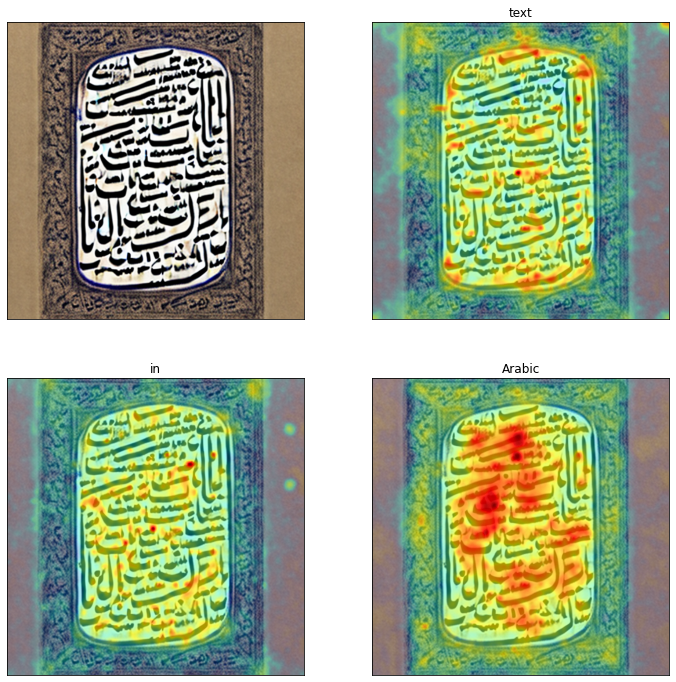

In [8]:
# load matplotlib
from matplotlib import pyplot as plt

# set figure size
plt.rcParams['figure.figsize'] = (12, 12)

# set subplots
fig, ax = plt.subplots(2, 2)

# omit ticks
for ax_ in ax.flatten():
   ax_.set_xticks([])
   ax_.set_yticks([])

# show generated image
ax[0, 0].imshow(image)

# show mapping for "text"
heat_map.compute_word_heat_map('text').plot_overlay(image, ax=ax[0, 1])

# show mapping for "in"
heat_map.compute_word_heat_map('in').plot_overlay(image, ax=ax[1, 0])

# show mapping for "Arabic"
heat_map.compute_word_heat_map('Arabic').plot_overlay(image, ax=ax[1, 1])

plt.show()